<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment8/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**



# 1. Load Data
<hr>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]
z = data
print(f"X shape = {x.shape}")
print(f"Y shape = {y.shape}")
print(f"Z shape = {z.shape}")

X shape = (50,)
Y shape = (50,)
Z shape = (50, 2)


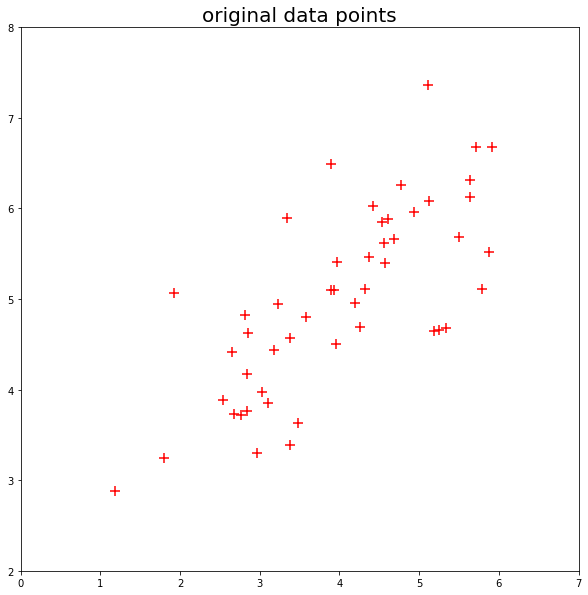

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(x,y, marker = "+", s = 100, c="r")
plt.title("original data points", fontsize = 20)
plt.xlim([0, 7])
plt.ylim([2, 8])
plt.show()

# 2. Normalize Data
<hr>

In [54]:
def normalize_data(x, y):

    xn = (x - np.mean(x))/np.std(x)
    yn = (y - np.mean(y))/np.std(y)

    return xn, yn

In [55]:
x_normalize, y_normalize = normalize_data(x,y)

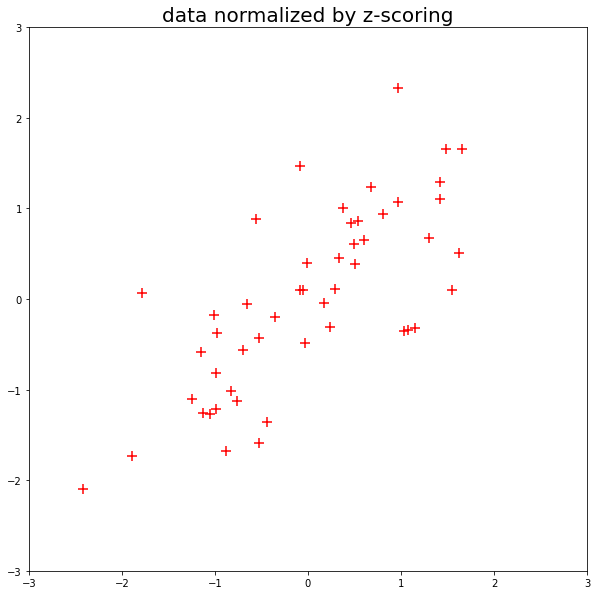

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.title("data normalized by z-scoring", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

# 3. Find Principal Direction
<hr>

In [90]:
z_normalize = np.vstack([x_normalize, y_normalize]).T
print(z_normalize.shape)

(50, 2)


In [92]:
print(x_normalize[:5])

[-0.5233151   0.46381907 -1.14839444 -1.0540573  -0.98402134]


In [91]:
print(z_normalize[:5])

[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]
 [-1.14839444 -0.58316356]
 [-1.0540573  -1.27072124]
 [-0.98402134 -0.8165806 ]]


In [129]:
def compute_covariance(Z):

    covar = np.cov(Z.T)# compute the covariance matrix #
    ## 실제 수식으로 구해보았지만, numpy의 소숫점 정확도가 더 정확해 numpy를 선택
    return covar
  
def compute_principal_direction(covariance):

    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    eigenvectors = eigenvectors.T
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    
    return eigenvalues, eigenvectors, idx
#idx는 eigenvalue가 큰 순서부터의 index를 가짐

In [95]:
## co variance matrix 구하기
cov = compute_covariance(z_normalize)
print(cov)
print(cov.shape)

[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]
(2, 2)


In [131]:
## eigenvector, eigenvalue 구하기
eigenvalues, eigenvectors, eigen_order = compute_principal_direction(cov)
print(eigenvalues.shape)
print(eigenvectors.shape)
print(eigenvalues)
print(eigenvectors)
print(eigen_order)

(2,)
(2, 2)
[1.77094898 0.26986734]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[0 1]


In [134]:
## vector를 그릴 점 구하기
x_vector_1 = -eigenvalues[eigen_order[0]]
y_vector_1 = eigenvectors_t[0][1]/eigenvectors_t[0][0] * x_vector_1
x_vector_2 = -eigenvalues[eigen_order[1]]
y_vector_2 = eigenvectors_t[1][1]/eigenvectors_t[1][0] * x_vector_2

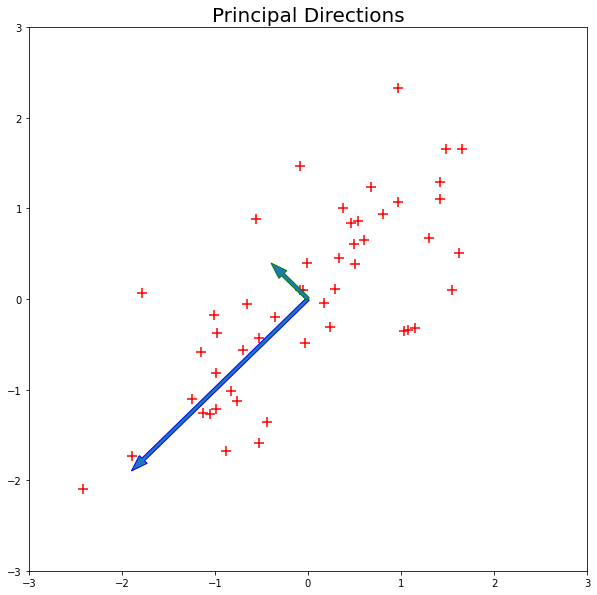

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.arrow(0, 0, x_vector_1, y_vector_1, width = 0.04, ec='blue')
plt.arrow(0, 0, x_vector_2, y_vector_2, width = 0.04, ec='green')
plt.title("Principal Directions", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

(2,)
(2, 2)


In [97]:
print(eigenvectors)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


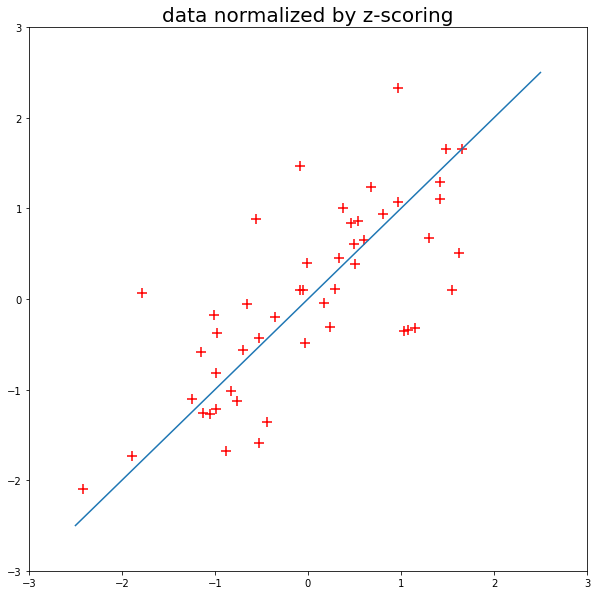

In [101]:
x_test = np.linspace(-2.5,2.5)
y_test = eigenvectors[0][1]/eigenvectors[0][0] * x_test
plt.figure(figsize=(10,10))
plt.scatter(x_normalize,y_normalize, marker = "+", s = 100, c="r")
plt.plot(x_test,y_test)
plt.title("data normalized by z-scoring", fontsize = 20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()